In [1]:
import pandas as pd
files = [
    '../input/food-prices-in-world/2- food-expenditure-per-person-per-year.csv',
'../input/food-prices-in-world/4- share-calorie-diet-unaffordable.csv',
'../input/food-prices-in-world/3- hare-of-consumer-expenditure-spent-on-food.csv',
'../input/food-prices-in-world/1- share-healthy-diet-unaffordable.csv'
]
files = sorted(files)
dfs = [pd.read_csv(filepath_or_buffer=item) for item in files]


In [2]:
for df in dfs:
    print('{} {}'.format(df.shape, df.columns) )
    print(df['Year'].unique())

(763, 4) Index(['Entity', 'Code', 'Year',
       'Share of the population who cannot afford a healthy diet'],
      dtype='object')
[2017 2018 2019 2020 2021]
(520, 4) Index(['Entity', 'Code', 'Year', 'Total food expenditure'], dtype='object')
[2017 2018 2019 2020 2021]
(520, 4) Index(['Entity', 'Code', 'Year',
       'Food as share of total consumer expenditure'],
      dtype='object')
[2017 2018 2019 2020 2021]
(155, 4) Index(['Entity', 'Code', 'Year',
       'Share of the population who cannot afford sufficient calories'],
      dtype='object')
[2017]


We have two different kinds of data: one related to people/diet, the other related to costs

In [3]:
names = [df.columns[3] for df in dfs]
means = [df.drop(columns=['Code', 'Year']).groupby(['Entity'])[names[index]].mean().to_frame() for index, df in enumerate(dfs)]
people_df = means[0].merge(right=means[3], on='Entity')
costs_df = means[1].merge(right=means[2], on='Entity')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='Share of the population who cannot afford a healthy diet', ylabel='Share of the population who cannot afford sufficient calories'>

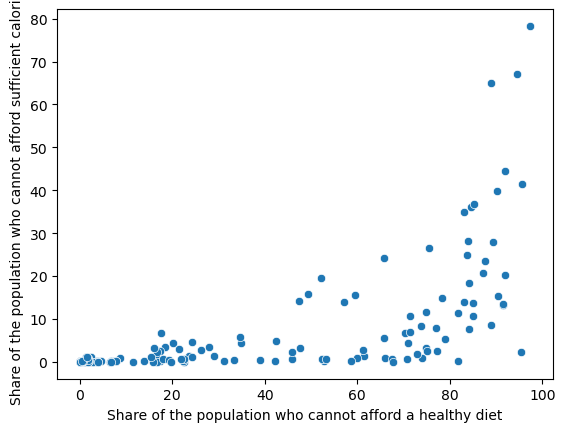

In [4]:
from seaborn import scatterplot
scatterplot(data=people_df, x=names[0], y=names[3])

<Axes: xlabel='Total food expenditure', ylabel='Food as share of total consumer expenditure'>

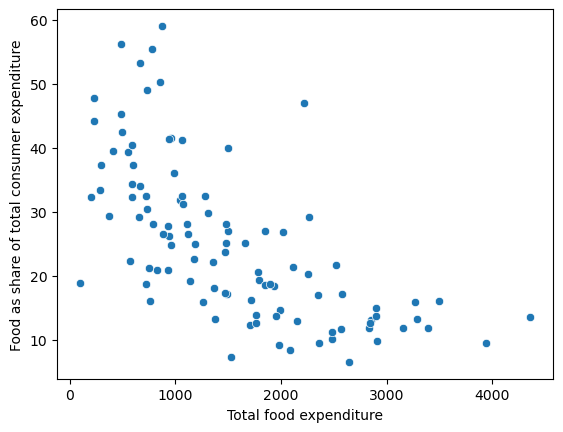

In [5]:
scatterplot(data=costs_df, x=names[1], y=names[2])